# Classifier on CIFAR10

## Using 3-Layer MLP

In [1]:
import tensorflow as tf
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model




Using TensorFlow backend.


In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size * 3

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) 
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [3]:
# hyper-parameters
batch_size = 256
n_units = 256
epochs = 3

In [4]:
# model is a 3-layer MLP
model = Sequential(name='3-layer-MLP')
model.add(Dense(n_units, input_dim=input_size, activation='relu', name='input_layer'))
model.add(Dense(n_units, activation='relu', name='hidden_layer'))
model.add(Dense(num_labels, activation='softmax', name='output_layer'))
model.summary()

Model: "3-layer-MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 256)               786688    
_________________________________________________________________
hidden_layer (Dense)         (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Train on 50000 samples, validate on 10000 samples
Epoch 1/3


  256/50000 [..............................] - ETA: 5:34 - loss: 2.3733 - accuracy: 0.0977

  768/50000 [..............................] - ETA: 1:54 - loss: 2.3319 - accuracy: 0.0964

 1280/50000 [..............................] - ETA: 1:10 - loss: 2.3151 - accuracy: 0.1039

 1792/50000 [>.............................] - ETA: 51s - loss: 2.3057 - accuracy: 0.1110 

 2304/50000 [>.............................] - ETA: 40s - loss: 2.2987 - accuracy: 0.1224

 2816/50000 [>.............................] - ETA: 33s - loss: 2.2902 - accuracy: 0.1275

 3328/50000 [>.............................] - ETA: 29s - loss: 2.2837 - accuracy: 0.1358

 3840/50000 [=>............................] - ETA: 25s - loss: 2.2791 - accuracy: 0.1372

 4352/50000 [=>............................] - ETA: 22s - loss: 2.2740 - accuracy: 0.1443

 4864/50000 [=>............................] - ETA: 20s - loss: 2.2681 - accuracy: 0.1503

 5376/50000 [==>...........................] - ETA: 18s - loss: 2.2642 - accuracy: 0.1520

 5888/50000 [==>...........................] - ETA: 17s - loss: 2.2597 - accuracy: 0.1544

 6400/50000 [==>...........................] - ETA: 16s - loss: 2.2532 - accuracy: 0.1598

 6912/50000 [===>..........................] - ETA: 15s - loss: 2.2481 - accuracy: 0.1619

 7424/50000 [===>..........................] - ETA: 14s - loss: 2.2432 - accuracy: 0.1658

 8192/50000 [===>..........................] - ETA: 13s - loss: 2.2381 - accuracy: 0.1698

 8704/50000 [====>.........................] - ETA: 12s - loss: 2.2354 - accuracy: 0.1733

 9216/50000 [====>.........................] - ETA: 11s - loss: 2.2328 - accuracy: 0.1737

 9728/50000 [====>.........................] - ETA: 11s - loss: 2.2293 - accuracy: 0.1755

10240/50000 [=====>........................] - ETA: 10s - loss: 2.2254 - accuracy: 0.1786

10752/50000 [=====>........................] - ETA: 10s - loss: 2.2231 - accuracy: 0.1806

11264/50000 [=====>........................] - ETA: 10s - loss: 2.2199 - accuracy: 0.1823

11776/50000 [======>.......................] - ETA: 9s - loss: 2.2160 - accuracy: 0.1865 

12288/50000 [======>.......................] - ETA: 9s - loss: 2.2121 - accuracy: 0.1888

12800/50000 [======>.......................] - ETA: 9s - loss: 2.2096 - accuracy: 0.1898

13312/50000 [======>.......................] - ETA: 9s - loss: 2.2065 - accuracy: 0.1910

13824/50000 [=======>......................] - ETA: 8s - loss: 2.2040 - accuracy: 0.1929

14336/50000 [=======>......................] - ETA: 8s - loss: 2.2009 - accuracy: 0.1952

14848/50000 [=======>......................] - ETA: 8s - loss: 2.1980 - accuracy: 0.1977

15360/50000 [========>.....................] - ETA: 7s - loss: 2.1959 - accuracy: 0.1985

15872/50000 [========>.....................] - ETA: 7s - loss: 2.1938 - accuracy: 0.1991

16384/50000 [========>.....................] - ETA: 7s - loss: 2.1900 - accuracy: 0.2004

16896/50000 [=========>....................] - ETA: 7s - loss: 2.1873 - accuracy: 0.2012

17408/50000 [=========>....................] - ETA: 7s - loss: 2.1839 - accuracy: 0.2027

17920/50000 [=========>....................] - ETA: 6s - loss: 2.1814 - accuracy: 0.2044

18432/50000 [==========>...................] - ETA: 6s - loss: 2.1791 - accuracy: 0.2051

18944/50000 [==========>...................] - ETA: 6s - loss: 2.1771 - accuracy: 0.2063

19456/50000 [==========>...................] - ETA: 6s - loss: 2.1762 - accuracy: 0.2062

19968/50000 [==========>...................] - ETA: 6s - loss: 2.1739 - accuracy: 0.2078

20480/50000 [===========>..................] - ETA: 5s - loss: 2.1712 - accuracy: 0.2094

20992/50000 [===========>..................] - ETA: 5s - loss: 2.1688 - accuracy: 0.2111

21504/50000 [===========>..................] - ETA: 5s - loss: 2.1664 - accuracy: 0.2128

22016/50000 [============>.................] - ETA: 5s - loss: 2.1647 - accuracy: 0.2137

22528/50000 [============>.................] - ETA: 5s - loss: 2.1627 - accuracy: 0.2147

23040/50000 [============>.................] - ETA: 5s - loss: 2.1602 - accuracy: 0.2155

23552/50000 [=============>................] - ETA: 5s - loss: 2.1583 - accuracy: 0.2161

23808/50000 [=============>................] - ETA: 5s - loss: 2.1573 - accuracy: 0.2165

24320/50000 [=============>................] - ETA: 4s - loss: 2.1543 - accuracy: 0.2179

24576/50000 [=============>................] - ETA: 4s - loss: 2.1533 - accuracy: 0.2184

25088/50000 [==============>...............] - ETA: 4s - loss: 2.1512 - accuracy: 0.2197

25600/50000 [==============>...............] - ETA: 4s - loss: 2.1490 - accuracy: 0.2210

26112/50000 [==============>...............] - ETA: 4s - loss: 2.1466 - accuracy: 0.2214

26624/50000 [==============>...............] - ETA: 4s - loss: 2.1447 - accuracy: 0.2222

27136/50000 [===============>..............] - ETA: 4s - loss: 2.1438 - accuracy: 0.2223

27648/50000 [===============>..............] - ETA: 4s - loss: 2.1429 - accuracy: 0.2227

28160/50000 [===============>..............] - ETA: 3s - loss: 2.1410 - accuracy: 0.2232

28672/50000 [================>.............] - ETA: 3s - loss: 2.1386 - accuracy: 0.2245

29184/50000 [================>.............] - ETA: 3s - loss: 2.1368 - accuracy: 0.2251

29696/50000 [================>.............] - ETA: 3s - loss: 2.1350 - accuracy: 0.2260

30208/50000 [=================>............] - ETA: 3s - loss: 2.1331 - accuracy: 0.2268

30720/50000 [=================>............] - ETA: 3s - loss: 2.1309 - accuracy: 0.2286

31232/50000 [=================>............] - ETA: 3s - loss: 2.1293 - accuracy: 0.2291

31744/50000 [==================>...........] - ETA: 3s - loss: 2.1275 - accuracy: 0.2300

32256/50000 [==================>...........] - ETA: 3s - loss: 2.1253 - accuracy: 0.2316

32768/50000 [==================>...........] - ETA: 2s - loss: 2.1245 - accuracy: 0.2320

33280/50000 [==================>...........] - ETA: 2s - loss: 2.1229 - accuracy: 0.2328

33792/50000 [===================>..........] - ETA: 2s - loss: 2.1214 - accuracy: 0.2333

34304/50000 [===================>..........] - ETA: 2s - loss: 2.1197 - accuracy: 0.2341

34816/50000 [===================>..........] - ETA: 2s - loss: 2.1184 - accuracy: 0.2343

35328/50000 [====================>.........] - ETA: 2s - loss: 2.1177 - accuracy: 0.2344

35840/50000 [====================>.........] - ETA: 2s - loss: 2.1163 - accuracy: 0.2348

36352/50000 [====================>.........] - ETA: 2s - loss: 2.1142 - accuracy: 0.2360

36864/50000 [=====================>........] - ETA: 2s - loss: 2.1122 - accuracy: 0.2370

37376/50000 [=====================>........] - ETA: 2s - loss: 2.1104 - accuracy: 0.2375

37888/50000 [=====================>........] - ETA: 2s - loss: 2.1089 - accuracy: 0.2382

38400/50000 [======================>.......] - ETA: 1s - loss: 2.1080 - accuracy: 0.2385

38912/50000 [======================>.......] - ETA: 1s - loss: 2.1062 - accuracy: 0.2392

39424/50000 [======================>.......] - ETA: 1s - loss: 2.1053 - accuracy: 0.2396

39936/50000 [======================>.......] - ETA: 1s - loss: 2.1035 - accuracy: 0.2407

40704/50000 [=======================>......] - ETA: 1s - loss: 2.1010 - accuracy: 0.2417

41216/50000 [=======================>......] - ETA: 1s - loss: 2.0996 - accuracy: 0.2422

41728/50000 [========================>.....] - ETA: 1s - loss: 2.0976 - accuracy: 0.2434

42240/50000 [========================>.....] - ETA: 1s - loss: 2.0954 - accuracy: 0.2444

42752/50000 [========================>.....] - ETA: 1s - loss: 2.0945 - accuracy: 0.2449

43264/50000 [========================>.....] - ETA: 1s - loss: 2.0929 - accuracy: 0.2452

43776/50000 [=========================>....] - ETA: 1s - loss: 2.0914 - accuracy: 0.2462

44288/50000 [=========================>....] - ETA: 0s - loss: 2.0894 - accuracy: 0.2470

44800/50000 [=========================>....] - ETA: 0s - loss: 2.0878 - accuracy: 0.2476

45312/50000 [==========================>...] - ETA: 0s - loss: 2.0867 - accuracy: 0.2479

45824/50000 [==========================>...] - ETA: 0s - loss: 2.0853 - accuracy: 0.2487

46336/50000 [==========================>...] - ETA: 0s - loss: 2.0843 - accuracy: 0.2488

46848/50000 [===========================>..] - ETA: 0s - loss: 2.0833 - accuracy: 0.2494

47360/50000 [===========================>..] - ETA: 0s - loss: 2.0823 - accuracy: 0.2496

48128/50000 [===========================>..] - ETA: 0s - loss: 2.0809 - accuracy: 0.2503

48640/50000 [============================>.] - ETA: 0s - loss: 2.0796 - accuracy: 0.2507



49408/50000 [============================>.] - ETA: 0s - loss: 2.0774 - accuracy: 0.2516

49920/50000 [============================>.] - ETA: 0s - loss: 2.0764 - accuracy: 0.2521

50000/50000 [==============================] - 9s 171us/sample - loss: 2.0760 - accuracy: 0.2522 - val_loss: 1.9667 - val_accuracy: 0.2906


Epoch 2/3
  256/50000 [..............................] - ETA: 5s - loss: 1.8871 - accuracy: 0.3477

  768/50000 [..............................] - ETA: 5s - loss: 1.9539 - accuracy: 0.3099

 1280/50000 [..............................] - ETA: 5s - loss: 1.9416 - accuracy: 0.3070

 2048/50000 [>.............................] - ETA: 4s - loss: 1.9396 - accuracy: 0.3228

 2560/50000 [>.............................] - ETA: 4s - loss: 1.9360 - accuracy: 0.3281

 3072/50000 [>.............................] - ETA: 4s - loss: 1.9380 - accuracy: 0.3268

 3584/50000 [=>............................] - ETA: 4s - loss: 1.9432 - accuracy: 0.3206

 4096/50000 [=>............................] - ETA: 4s - loss: 1.9367 - accuracy: 0.3228

 4864/50000 [=>............................] - ETA: 4s - loss: 1.9386 - accuracy: 0.3201

 5376/50000 [==>...........................] - ETA: 4s - loss: 1.9402 - accuracy: 0.3205

 5888/50000 [==>...........................] - ETA: 4s - loss: 1.9404 - accuracy: 0.3217

 6656/50000 [==>...........................] - ETA: 4s - loss: 1.9415 - accuracy: 0.3199

 7168/50000 [===>..........................] - ETA: 4s - loss: 1.9395 - accuracy: 0.3193

 7936/50000 [===>..........................] - ETA: 4s - loss: 1.9378 - accuracy: 0.3189

 8704/50000 [====>.........................] - ETA: 4s - loss: 1.9403 - accuracy: 0.3178

 9216/50000 [====>.........................] - ETA: 4s - loss: 1.9380 - accuracy: 0.3181

 9984/50000 [====>.........................] - ETA: 4s - loss: 1.9361 - accuracy: 0.3203

10752/50000 [=====>........................] - ETA: 3s - loss: 1.9360 - accuracy: 0.3209

11520/50000 [=====>........................] - ETA: 3s - loss: 1.9354 - accuracy: 0.3204

12288/50000 [======>.......................] - ETA: 3s - loss: 1.9349 - accuracy: 0.3189

12800/50000 [======>.......................] - ETA: 3s - loss: 1.9343 - accuracy: 0.3193

13568/50000 [=======>......................] - ETA: 3s - loss: 1.9326 - accuracy: 0.3194

14336/50000 [=======>......................] - ETA: 3s - loss: 1.9320 - accuracy: 0.3191



14848/50000 [=======>......................] - ETA: 3s - loss: 1.9329 - accuracy: 0.3194

15360/50000 [========>.....................] - ETA: 3s - loss: 1.9321 - accuracy: 0.3197

15872/50000 [========>.....................] - ETA: 3s - loss: 1.9295 - accuracy: 0.3208

16384/50000 [========>.....................] - ETA: 3s - loss: 1.9292 - accuracy: 0.3206

16896/50000 [=========>....................] - ETA: 3s - loss: 1.9279 - accuracy: 0.3209

17408/50000 [=========>....................] - ETA: 3s - loss: 1.9289 - accuracy: 0.3204

17920/50000 [=========>....................] - ETA: 3s - loss: 1.9299 - accuracy: 0.3196

18688/50000 [==========>...................] - ETA: 3s - loss: 1.9296 - accuracy: 0.3198

19456/50000 [==========>...................] - ETA: 3s - loss: 1.9290 - accuracy: 0.3200

19968/50000 [==========>...................] - ETA: 3s - loss: 1.9295 - accuracy: 0.3197

20480/50000 [===========>..................] - ETA: 2s - loss: 1.9302 - accuracy: 0.3181

20992/50000 [===========>..................] - ETA: 2s - loss: 1.9297 - accuracy: 0.3184

21504/50000 [===========>..................] - ETA: 2s - loss: 1.9281 - accuracy: 0.3183

22016/50000 [============>.................] - ETA: 2s - loss: 1.9289 - accuracy: 0.3180

22528/50000 [============>.................] - ETA: 2s - loss: 1.9268 - accuracy: 0.3190

23040/50000 [============>.................] - ETA: 2s - loss: 1.9281 - accuracy: 0.3183

23552/50000 [=============>................] - ETA: 2s - loss: 1.9277 - accuracy: 0.3190

24064/50000 [=============>................] - ETA: 2s - loss: 1.9270 - accuracy: 0.3194

24576/50000 [=============>................] - ETA: 2s - loss: 1.9261 - accuracy: 0.3199

25088/50000 [==============>...............] - ETA: 2s - loss: 1.9256 - accuracy: 0.3204

25600/50000 [==============>...............] - ETA: 2s - loss: 1.9264 - accuracy: 0.3201

26112/50000 [==============>...............] - ETA: 2s - loss: 1.9256 - accuracy: 0.3195

26624/50000 [==============>...............] - ETA: 2s - loss: 1.9254 - accuracy: 0.3193

27136/50000 [===============>..............] - ETA: 2s - loss: 1.9251 - accuracy: 0.3196

27648/50000 [===============>..............] - ETA: 2s - loss: 1.9250 - accuracy: 0.3194

28160/50000 [===============>..............] - ETA: 2s - loss: 1.9250 - accuracy: 0.3196

28672/50000 [================>.............] - ETA: 2s - loss: 1.9241 - accuracy: 0.3201

29184/50000 [================>.............] - ETA: 2s - loss: 1.9232 - accuracy: 0.3200

29696/50000 [================>.............] - ETA: 2s - loss: 1.9230 - accuracy: 0.3200

30208/50000 [=================>............] - ETA: 2s - loss: 1.9235 - accuracy: 0.3203

30720/50000 [=================>............] - ETA: 2s - loss: 1.9232 - accuracy: 0.3200

31232/50000 [=================>............] - ETA: 1s - loss: 1.9229 - accuracy: 0.3200

31744/50000 [==================>...........] - ETA: 1s - loss: 1.9228 - accuracy: 0.3202

32256/50000 [==================>...........] - ETA: 1s - loss: 1.9224 - accuracy: 0.3204

32768/50000 [==================>...........] - ETA: 1s - loss: 1.9221 - accuracy: 0.3203

33280/50000 [==================>...........] - ETA: 1s - loss: 1.9217 - accuracy: 0.3203

34048/50000 [===================>..........] - ETA: 1s - loss: 1.9211 - accuracy: 0.3210

34560/50000 [===================>..........] - ETA: 1s - loss: 1.9199 - accuracy: 0.3212

35072/50000 [====================>.........] - ETA: 1s - loss: 1.9194 - accuracy: 0.3217

35584/50000 [====================>.........] - ETA: 1s - loss: 1.9192 - accuracy: 0.3216

36096/50000 [====================>.........] - ETA: 1s - loss: 1.9189 - accuracy: 0.3215

36608/50000 [====================>.........] - ETA: 1s - loss: 1.9184 - accuracy: 0.3219

37120/50000 [=====================>........] - ETA: 1s - loss: 1.9168 - accuracy: 0.3228

37632/50000 [=====================>........] - ETA: 1s - loss: 1.9160 - accuracy: 0.3229

38144/50000 [=====================>........] - ETA: 1s - loss: 1.9156 - accuracy: 0.3229

38656/50000 [======================>.......] - ETA: 1s - loss: 1.9150 - accuracy: 0.3229

39168/50000 [======================>.......] - ETA: 1s - loss: 1.9144 - accuracy: 0.3236

39680/50000 [======================>.......] - ETA: 1s - loss: 1.9144 - accuracy: 0.3235

40192/50000 [=======================>......] - ETA: 1s - loss: 1.9139 - accuracy: 0.3236

40960/50000 [=======================>......] - ETA: 0s - loss: 1.9133 - accuracy: 0.3240

41728/50000 [========================>.....] - ETA: 0s - loss: 1.9126 - accuracy: 0.3246

42240/50000 [========================>.....] - ETA: 0s - loss: 1.9117 - accuracy: 0.3253

42752/50000 [========================>.....] - ETA: 0s - loss: 1.9112 - accuracy: 0.3255

43520/50000 [=========================>....] - ETA: 0s - loss: 1.9105 - accuracy: 0.3253

44032/50000 [=========================>....] - ETA: 0s - loss: 1.9104 - accuracy: 0.3252

44800/50000 [=========================>....] - ETA: 0s - loss: 1.9092 - accuracy: 0.3257

45312/50000 [==========================>...] - ETA: 0s - loss: 1.9090 - accuracy: 0.3258

45824/50000 [==========================>...] - ETA: 0s - loss: 1.9088 - accuracy: 0.3260

46336/50000 [==========================>...] - ETA: 0s - loss: 1.9084 - accuracy: 0.3262

46848/50000 [===========================>..] - ETA: 0s - loss: 1.9085 - accuracy: 0.3262

47360/50000 [===========================>..] - ETA: 0s - loss: 1.9078 - accuracy: 0.3266

47872/50000 [===========================>..] - ETA: 0s - loss: 1.9070 - accuracy: 0.3269

48384/50000 [============================>.] - ETA: 0s - loss: 1.9065 - accuracy: 0.3272

48896/50000 [============================>.] - ETA: 0s - loss: 1.9059 - accuracy: 0.3274

49664/50000 [============================>.] - ETA: 0s - loss: 1.9057 - accuracy: 0.3275

50000/50000 [==============================] - 6s 119us/sample - loss: 1.9052 - accuracy: 0.3277 - val_loss: 1.8713 - val_accuracy: 0.3447


Epoch 3/3
  256/50000 [..............................] - ETA: 5s - loss: 1.8968 - accuracy: 0.3203

  768/50000 [..............................] - ETA: 5s - loss: 1.8895 - accuracy: 0.3255

 1280/50000 [..............................] - ETA: 5s - loss: 1.8666 - accuracy: 0.3367

 1792/50000 [>.............................] - ETA: 5s - loss: 1.8616 - accuracy: 0.3421

 2560/50000 [>.............................] - ETA: 5s - loss: 1.8725 - accuracy: 0.3398

 3072/50000 [>.............................] - ETA: 4s - loss: 1.8793 - accuracy: 0.3333

 3584/50000 [=>............................] - ETA: 4s - loss: 1.8762 - accuracy: 0.3304

 4096/50000 [=>............................] - ETA: 4s - loss: 1.8693 - accuracy: 0.3354

 4608/50000 [=>............................] - ETA: 4s - loss: 1.8687 - accuracy: 0.3392

 5120/50000 [==>...........................] - ETA: 4s - loss: 1.8633 - accuracy: 0.3434

 5632/50000 [==>...........................] - ETA: 4s - loss: 1.8631 - accuracy: 0.3436

 6144/50000 [==>...........................] - ETA: 4s - loss: 1.8625 - accuracy: 0.3439

 6656/50000 [==>...........................] - ETA: 4s - loss: 1.8634 - accuracy: 0.3438

 7168/50000 [===>..........................] - ETA: 4s - loss: 1.8598 - accuracy: 0.3465

 7680/50000 [===>..........................] - ETA: 4s - loss: 1.8654 - accuracy: 0.3443

 8192/50000 [===>..........................] - ETA: 4s - loss: 1.8656 - accuracy: 0.3442

 8704/50000 [====>.........................] - ETA: 4s - loss: 1.8655 - accuracy: 0.3433

 9216/50000 [====>.........................] - ETA: 4s - loss: 1.8659 - accuracy: 0.3441

 9728/50000 [====>.........................] - ETA: 4s - loss: 1.8637 - accuracy: 0.3454

10240/50000 [=====>........................] - ETA: 4s - loss: 1.8660 - accuracy: 0.3450

10752/50000 [=====>........................] - ETA: 4s - loss: 1.8663 - accuracy: 0.3441

11264/50000 [=====>........................] - ETA: 4s - loss: 1.8661 - accuracy: 0.3449

11776/50000 [======>.......................] - ETA: 4s - loss: 1.8637 - accuracy: 0.3452

12288/50000 [======>.......................] - ETA: 3s - loss: 1.8649 - accuracy: 0.3432

12800/50000 [======>.......................] - ETA: 3s - loss: 1.8646 - accuracy: 0.3434

13312/50000 [======>.......................] - ETA: 3s - loss: 1.8658 - accuracy: 0.3425

13824/50000 [=======>......................] - ETA: 3s - loss: 1.8643 - accuracy: 0.3430

14336/50000 [=======>......................] - ETA: 3s - loss: 1.8657 - accuracy: 0.3426

14848/50000 [=======>......................] - ETA: 3s - loss: 1.8646 - accuracy: 0.3437

15360/50000 [========>.....................] - ETA: 3s - loss: 1.8639 - accuracy: 0.3440

16128/50000 [========>.....................] - ETA: 3s - loss: 1.8625 - accuracy: 0.3450

16640/50000 [========>.....................] - ETA: 3s - loss: 1.8615 - accuracy: 0.3466

16896/50000 [=========>....................] - ETA: 3s - loss: 1.8603 - accuracy: 0.3472

17664/50000 [=========>....................] - ETA: 3s - loss: 1.8602 - accuracy: 0.3479

18176/50000 [=========>....................] - ETA: 3s - loss: 1.8595 - accuracy: 0.3481

18688/50000 [==========>...................] - ETA: 3s - loss: 1.8579 - accuracy: 0.3484

19200/50000 [==========>...................] - ETA: 3s - loss: 1.8567 - accuracy: 0.3498

19712/50000 [==========>...................] - ETA: 3s - loss: 1.8581 - accuracy: 0.3488

20224/50000 [===========>..................] - ETA: 3s - loss: 1.8583 - accuracy: 0.3481

20736/50000 [===========>..................] - ETA: 3s - loss: 1.8585 - accuracy: 0.3480

21248/50000 [===========>..................] - ETA: 3s - loss: 1.8567 - accuracy: 0.3492

21760/50000 [============>.................] - ETA: 3s - loss: 1.8568 - accuracy: 0.3486

22528/50000 [============>.................] - ETA: 2s - loss: 1.8562 - accuracy: 0.3486

23040/50000 [============>.................] - ETA: 2s - loss: 1.8557 - accuracy: 0.3484

23552/50000 [=============>................] - ETA: 2s - loss: 1.8553 - accuracy: 0.3488

24064/50000 [=============>................] - ETA: 2s - loss: 1.8547 - accuracy: 0.3493

24576/50000 [=============>................] - ETA: 2s - loss: 1.8541 - accuracy: 0.3491

25088/50000 [==============>...............] - ETA: 2s - loss: 1.8537 - accuracy: 0.3492

25600/50000 [==============>...............] - ETA: 2s - loss: 1.8536 - accuracy: 0.3494

26368/50000 [==============>...............] - ETA: 2s - loss: 1.8534 - accuracy: 0.3497

26880/50000 [===============>..............] - ETA: 2s - loss: 1.8525 - accuracy: 0.3505

27392/50000 [===============>..............] - ETA: 2s - loss: 1.8521 - accuracy: 0.3506

27904/50000 [===============>..............] - ETA: 2s - loss: 1.8510 - accuracy: 0.3509

28416/50000 [================>.............] - ETA: 2s - loss: 1.8505 - accuracy: 0.3512

28928/50000 [================>.............] - ETA: 2s - loss: 1.8503 - accuracy: 0.3514

29440/50000 [================>.............] - ETA: 2s - loss: 1.8494 - accuracy: 0.3515

30208/50000 [=================>............] - ETA: 2s - loss: 1.8481 - accuracy: 0.3520

30720/50000 [=================>............] - ETA: 2s - loss: 1.8478 - accuracy: 0.3522

31232/50000 [=================>............] - ETA: 2s - loss: 1.8473 - accuracy: 0.3524

31744/50000 [==================>...........] - ETA: 1s - loss: 1.8469 - accuracy: 0.3526

32256/50000 [==================>...........] - ETA: 1s - loss: 1.8466 - accuracy: 0.3522

32768/50000 [==================>...........] - ETA: 1s - loss: 1.8458 - accuracy: 0.3527

33280/50000 [==================>...........] - ETA: 1s - loss: 1.8461 - accuracy: 0.3524

33792/50000 [===================>..........] - ETA: 1s - loss: 1.8465 - accuracy: 0.3523

34560/50000 [===================>..........] - ETA: 1s - loss: 1.8470 - accuracy: 0.3525

35072/50000 [====================>.........] - ETA: 1s - loss: 1.8470 - accuracy: 0.3523

35584/50000 [====================>.........] - ETA: 1s - loss: 1.8464 - accuracy: 0.3525

36096/50000 [====================>.........] - ETA: 1s - loss: 1.8457 - accuracy: 0.3529

36608/50000 [====================>.........] - ETA: 1s - loss: 1.8457 - accuracy: 0.3530

37120/50000 [=====================>........] - ETA: 1s - loss: 1.8458 - accuracy: 0.3528

37632/50000 [=====================>........] - ETA: 1s - loss: 1.8459 - accuracy: 0.3525

38144/50000 [=====================>........] - ETA: 1s - loss: 1.8459 - accuracy: 0.3525

38656/50000 [======================>.......] - ETA: 1s - loss: 1.8448 - accuracy: 0.3529

39168/50000 [======================>.......] - ETA: 1s - loss: 1.8450 - accuracy: 0.3531

39936/50000 [======================>.......] - ETA: 1s - loss: 1.8453 - accuracy: 0.3535

40448/50000 [=======================>......] - ETA: 1s - loss: 1.8447 - accuracy: 0.3535

40960/50000 [=======================>......] - ETA: 0s - loss: 1.8443 - accuracy: 0.3536

41472/50000 [=======================>......] - ETA: 0s - loss: 1.8442 - accuracy: 0.3542

41984/50000 [========================>.....] - ETA: 0s - loss: 1.8438 - accuracy: 0.3547

42496/50000 [========================>.....] - ETA: 0s - loss: 1.8441 - accuracy: 0.3544

43008/50000 [========================>.....] - ETA: 0s - loss: 1.8435 - accuracy: 0.3546

43520/50000 [=========================>....] - ETA: 0s - loss: 1.8433 - accuracy: 0.3548

44032/50000 [=========================>....] - ETA: 0s - loss: 1.8427 - accuracy: 0.3548

44544/50000 [=========================>....] - ETA: 0s - loss: 1.8419 - accuracy: 0.3550

45312/50000 [==========================>...] - ETA: 0s - loss: 1.8415 - accuracy: 0.3556

45824/50000 [==========================>...] - ETA: 0s - loss: 1.8410 - accuracy: 0.3559

46336/50000 [==========================>...] - ETA: 0s - loss: 1.8413 - accuracy: 0.3563

46848/50000 [===========================>..] - ETA: 0s - loss: 1.8404 - accuracy: 0.3567

47360/50000 [===========================>..] - ETA: 0s - loss: 1.8404 - accuracy: 0.3566

47872/50000 [===========================>..] - ETA: 0s - loss: 1.8408 - accuracy: 0.3562

48384/50000 [============================>.] - ETA: 0s - loss: 1.8411 - accuracy: 0.3562

48896/50000 [============================>.] - ETA: 0s - loss: 1.8407 - accuracy: 0.3563

49408/50000 [============================>.] - ETA: 0s - loss: 1.8402 - accuracy: 0.3565

49920/50000 [============================>.] - ETA: 0s - loss: 1.8396 - accuracy: 0.3568

50000/50000 [==============================] - 6s 121us/sample - loss: 1.8394 - accuracy: 0.3568 - val_loss: 1.8399 - val_accuracy: 0.3475


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 34.7%


## Using 3-Layer CNN

In [6]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 3)
batch_size = 256
kernel_size = 3
pool_size = 3
filters = 32

In [8]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size, 
                 activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', 
                 input_shape=input_shape,
                 name='input_layer'))

model.add(MaxPooling2D(pool_size,name='hidden_layer'))
model.add(Flatten(name='hidden_layer2'))
model.add(Dense(10, activation='softmax',name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 32, 32, 32)        896       
_________________________________________________________________
hidden_layer (MaxPooling2D)  (None, 10, 10, 32)        0         
_________________________________________________________________
hidden_layer2 (Flatten)      (None, 3200)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                32010     
Total params: 32,906
Trainable params: 32,906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# train the network
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=1)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Train on 50000 samples
Epoch 1/3


  256/50000 [..............................] - ETA: 3:13 - loss: 2.5892 - accuracy: 0.1016

  512/50000 [..............................] - ETA: 1:48 - loss: 2.4876 - accuracy: 0.1074

  768/50000 [..............................] - ETA: 1:17 - loss: 2.4382 - accuracy: 0.1029

 1024/50000 [..............................] - ETA: 1:02 - loss: 2.4168 - accuracy: 0.1104

 1280/50000 [..............................] - ETA: 53s - loss: 2.3910 - accuracy: 0.1125 

 1536/50000 [..............................] - ETA: 48s - loss: 2.3665 - accuracy: 0.1198

 1792/50000 [>.............................] - ETA: 44s - loss: 2.3612 - accuracy: 0.1211

 2048/50000 [>.............................] - ETA: 40s - loss: 2.3559 - accuracy: 0.1221

 2304/50000 [>.............................] - ETA: 46s - loss: 2.3482 - accuracy: 0.1224

 2560/50000 [>.............................] - ETA: 44s - loss: 2.3387 - accuracy: 0.1297

 2816/50000 [>.............................] - ETA: 41s - loss: 2.3343 - accuracy: 0.1314

 3072/50000 [>.............................] - ETA: 39s - loss: 2.3268 - accuracy: 0.1335

 3328/50000 [>.............................] - ETA: 37s - loss: 2.3222 - accuracy: 0.1319

 3584/50000 [=>............................] - ETA: 35s - loss: 2.3205 - accuracy: 0.1350

 3840/50000 [=>............................] - ETA: 34s - loss: 2.3172 - accuracy: 0.1370

 4096/50000 [=>............................] - ETA: 33s - loss: 2.3141 - accuracy: 0.1389

 4352/50000 [=>............................] - ETA: 32s - loss: 2.3091 - accuracy: 0.1459

 4608/50000 [=>............................] - ETA: 32s - loss: 2.3049 - accuracy: 0.1478

 4864/50000 [=>............................] - ETA: 33s - loss: 2.2994 - accuracy: 0.1472

 5120/50000 [==>...........................] - ETA: 33s - loss: 2.2973 - accuracy: 0.1484

 5376/50000 [==>...........................] - ETA: 32s - loss: 2.3011 - accuracy: 0.1462

 5632/50000 [==>...........................] - ETA: 31s - loss: 2.3056 - accuracy: 0.1477

 5888/50000 [==>...........................] - ETA: 30s - loss: 2.3031 - accuracy: 0.1476

 6144/50000 [==>...........................] - ETA: 29s - loss: 2.2997 - accuracy: 0.1499

 6400/50000 [==>...........................] - ETA: 29s - loss: 2.2946 - accuracy: 0.1514

 6656/50000 [==>...........................] - ETA: 28s - loss: 2.2935 - accuracy: 0.1525

 6912/50000 [===>..........................] - ETA: 27s - loss: 2.2887 - accuracy: 0.1531

 7168/50000 [===>..........................] - ETA: 27s - loss: 2.2850 - accuracy: 0.1562

 7424/50000 [===>..........................] - ETA: 26s - loss: 2.2809 - accuracy: 0.1583

 7680/50000 [===>..........................] - ETA: 26s - loss: 2.2758 - accuracy: 0.1599

 7936/50000 [===>..........................] - ETA: 25s - loss: 2.2734 - accuracy: 0.1602

 8192/50000 [===>..........................] - ETA: 25s - loss: 2.2699 - accuracy: 0.1628

 8448/50000 [====>.........................] - ETA: 25s - loss: 2.2688 - accuracy: 0.1626

 8704/50000 [====>.........................] - ETA: 24s - loss: 2.2652 - accuracy: 0.1648

 8960/50000 [====>.........................] - ETA: 24s - loss: 2.2630 - accuracy: 0.1658

 9216/50000 [====>.........................] - ETA: 23s - loss: 2.2586 - accuracy: 0.1684

 9472/50000 [====>.........................] - ETA: 23s - loss: 2.2563 - accuracy: 0.1686

 9728/50000 [====>.........................] - ETA: 23s - loss: 2.2541 - accuracy: 0.1698

 9984/50000 [====>.........................] - ETA: 22s - loss: 2.2527 - accuracy: 0.1706

10240/50000 [=====>........................] - ETA: 22s - loss: 2.2504 - accuracy: 0.1718

10496/50000 [=====>........................] - ETA: 22s - loss: 2.2475 - accuracy: 0.1732

10752/50000 [=====>........................] - ETA: 21s - loss: 2.2462 - accuracy: 0.1727

11008/50000 [=====>........................] - ETA: 21s - loss: 2.2431 - accuracy: 0.1736

11264/50000 [=====>........................] - ETA: 21s - loss: 2.2417 - accuracy: 0.1737

11520/50000 [=====>........................] - ETA: 20s - loss: 2.2412 - accuracy: 0.1726

11776/50000 [======>.......................] - ETA: 20s - loss: 2.2403 - accuracy: 0.1726

12032/50000 [======>.......................] - ETA: 20s - loss: 2.2388 - accuracy: 0.1731

12288/50000 [======>.......................] - ETA: 19s - loss: 2.2376 - accuracy: 0.1732

12544/50000 [======>.......................] - ETA: 19s - loss: 2.2358 - accuracy: 0.1748

12800/50000 [======>.......................] - ETA: 19s - loss: 2.2357 - accuracy: 0.1750

13056/50000 [======>.......................] - ETA: 19s - loss: 2.2341 - accuracy: 0.1757

13312/50000 [======>.......................] - ETA: 19s - loss: 2.2322 - accuracy: 0.1762

13568/50000 [=======>......................] - ETA: 18s - loss: 2.2301 - accuracy: 0.1770

13824/50000 [=======>......................] - ETA: 18s - loss: 2.2290 - accuracy: 0.1777

14080/50000 [=======>......................] - ETA: 18s - loss: 2.2272 - accuracy: 0.1789

14336/50000 [=======>......................] - ETA: 18s - loss: 2.2245 - accuracy: 0.1802

14592/50000 [=======>......................] - ETA: 17s - loss: 2.2226 - accuracy: 0.1806

14848/50000 [=======>......................] - ETA: 17s - loss: 2.2200 - accuracy: 0.1816

15104/50000 [========>.....................] - ETA: 17s - loss: 2.2181 - accuracy: 0.1820

15360/50000 [========>.....................] - ETA: 17s - loss: 2.2161 - accuracy: 0.1829

15616/50000 [========>.....................] - ETA: 17s - loss: 2.2133 - accuracy: 0.1839

15872/50000 [========>.....................] - ETA: 16s - loss: 2.2107 - accuracy: 0.1849

16128/50000 [========>.....................] - ETA: 16s - loss: 2.2089 - accuracy: 0.1855

16384/50000 [========>.....................] - ETA: 16s - loss: 2.2075 - accuracy: 0.1862

16640/50000 [========>.....................] - ETA: 16s - loss: 2.2053 - accuracy: 0.1873

16896/50000 [=========>....................] - ETA: 16s - loss: 2.2035 - accuracy: 0.1876

17152/50000 [=========>....................] - ETA: 15s - loss: 2.2026 - accuracy: 0.1876

17408/50000 [=========>....................] - ETA: 15s - loss: 2.2019 - accuracy: 0.1877

17664/50000 [=========>....................] - ETA: 15s - loss: 2.2003 - accuracy: 0.1890

17920/50000 [=========>....................] - ETA: 15s - loss: 2.1979 - accuracy: 0.1903

18176/50000 [=========>....................] - ETA: 15s - loss: 2.1970 - accuracy: 0.1908

18432/50000 [==========>...................] - ETA: 15s - loss: 2.1963 - accuracy: 0.1914

18688/50000 [==========>...................] - ETA: 14s - loss: 2.1950 - accuracy: 0.1922

18944/50000 [==========>...................] - ETA: 14s - loss: 2.1928 - accuracy: 0.1931

19200/50000 [==========>...................] - ETA: 14s - loss: 2.1909 - accuracy: 0.1934

19456/50000 [==========>...................] - ETA: 14s - loss: 2.1895 - accuracy: 0.1941

19712/50000 [==========>...................] - ETA: 14s - loss: 2.1878 - accuracy: 0.1951

19968/50000 [==========>...................] - ETA: 14s - loss: 2.1863 - accuracy: 0.1951

20224/50000 [===========>..................] - ETA: 13s - loss: 2.1837 - accuracy: 0.1967

20480/50000 [===========>..................] - ETA: 13s - loss: 2.1825 - accuracy: 0.1971

20736/50000 [===========>..................] - ETA: 13s - loss: 2.1822 - accuracy: 0.1979

20992/50000 [===========>..................] - ETA: 13s - loss: 2.1811 - accuracy: 0.1982

21248/50000 [===========>..................] - ETA: 13s - loss: 2.1795 - accuracy: 0.1986

21504/50000 [===========>..................] - ETA: 13s - loss: 2.1781 - accuracy: 0.1995

21760/50000 [============>.................] - ETA: 13s - loss: 2.1766 - accuracy: 0.2000

22016/50000 [============>.................] - ETA: 12s - loss: 2.1748 - accuracy: 0.2007

22272/50000 [============>.................] - ETA: 12s - loss: 2.1733 - accuracy: 0.2013

22528/50000 [============>.................] - ETA: 12s - loss: 2.1727 - accuracy: 0.2015

22784/50000 [============>.................] - ETA: 12s - loss: 2.1716 - accuracy: 0.2020

23040/50000 [============>.................] - ETA: 12s - loss: 2.1702 - accuracy: 0.2025

23296/50000 [============>.................] - ETA: 12s - loss: 2.1688 - accuracy: 0.2030

23552/50000 [=============>................] - ETA: 12s - loss: 2.1672 - accuracy: 0.2034

23808/50000 [=============>................] - ETA: 11s - loss: 2.1661 - accuracy: 0.2043

24064/50000 [=============>................] - ETA: 11s - loss: 2.1652 - accuracy: 0.2044

24320/50000 [=============>................] - ETA: 11s - loss: 2.1645 - accuracy: 0.2052

24576/50000 [=============>................] - ETA: 11s - loss: 2.1629 - accuracy: 0.2059

24832/50000 [=============>................] - ETA: 11s - loss: 2.1609 - accuracy: 0.2070

25088/50000 [==============>...............] - ETA: 11s - loss: 2.1590 - accuracy: 0.2082

25344/50000 [==============>...............] - ETA: 11s - loss: 2.1581 - accuracy: 0.2086

25600/50000 [==============>...............] - ETA: 10s - loss: 2.1573 - accuracy: 0.2094

25856/50000 [==============>...............] - ETA: 10s - loss: 2.1555 - accuracy: 0.2104

26112/50000 [==============>...............] - ETA: 10s - loss: 2.1546 - accuracy: 0.2107

26368/50000 [==============>...............] - ETA: 10s - loss: 2.1532 - accuracy: 0.2115

26624/50000 [==============>...............] - ETA: 10s - loss: 2.1525 - accuracy: 0.2119

26880/50000 [===============>..............] - ETA: 10s - loss: 2.1509 - accuracy: 0.2125

27136/50000 [===============>..............] - ETA: 10s - loss: 2.1499 - accuracy: 0.2130

27392/50000 [===============>..............] - ETA: 10s - loss: 2.1491 - accuracy: 0.2134

27648/50000 [===============>..............] - ETA: 9s - loss: 2.1484 - accuracy: 0.2138 

27904/50000 [===============>..............] - ETA: 9s - loss: 2.1474 - accuracy: 0.2143

28160/50000 [===============>..............] - ETA: 9s - loss: 2.1461 - accuracy: 0.2150

28416/50000 [================>.............] - ETA: 9s - loss: 2.1454 - accuracy: 0.2155

28672/50000 [================>.............] - ETA: 9s - loss: 2.1446 - accuracy: 0.2160

28928/50000 [================>.............] - ETA: 9s - loss: 2.1433 - accuracy: 0.2164

29184/50000 [================>.............] - ETA: 9s - loss: 2.1420 - accuracy: 0.2177

29440/50000 [================>.............] - ETA: 9s - loss: 2.1412 - accuracy: 0.2182

29696/50000 [================>.............] - ETA: 8s - loss: 2.1404 - accuracy: 0.2187

29952/50000 [================>.............] - ETA: 8s - loss: 2.1397 - accuracy: 0.2191

30208/50000 [=================>............] - ETA: 8s - loss: 2.1384 - accuracy: 0.2198

30464/50000 [=================>............] - ETA: 8s - loss: 2.1372 - accuracy: 0.2203

30720/50000 [=================>............] - ETA: 8s - loss: 2.1363 - accuracy: 0.2205

30976/50000 [=================>............] - ETA: 8s - loss: 2.1355 - accuracy: 0.2209

31232/50000 [=================>............] - ETA: 8s - loss: 2.1344 - accuracy: 0.2214

31488/50000 [=================>............] - ETA: 8s - loss: 2.1332 - accuracy: 0.2220

31744/50000 [==================>...........] - ETA: 8s - loss: 2.1319 - accuracy: 0.2228

32000/50000 [==================>...........] - ETA: 7s - loss: 2.1313 - accuracy: 0.2230

32256/50000 [==================>...........] - ETA: 7s - loss: 2.1305 - accuracy: 0.2235

32512/50000 [==================>...........] - ETA: 7s - loss: 2.1297 - accuracy: 0.2239

32768/50000 [==================>...........] - ETA: 7s - loss: 2.1289 - accuracy: 0.2243

33024/50000 [==================>...........] - ETA: 7s - loss: 2.1278 - accuracy: 0.2250

33280/50000 [==================>...........] - ETA: 7s - loss: 2.1273 - accuracy: 0.2252

33536/50000 [===================>..........] - ETA: 7s - loss: 2.1263 - accuracy: 0.2254

33792/50000 [===================>..........] - ETA: 7s - loss: 2.1260 - accuracy: 0.2256

34048/50000 [===================>..........] - ETA: 6s - loss: 2.1246 - accuracy: 0.2261

34304/50000 [===================>..........] - ETA: 6s - loss: 2.1236 - accuracy: 0.2264

34560/50000 [===================>..........] - ETA: 6s - loss: 2.1226 - accuracy: 0.2268

34816/50000 [===================>..........] - ETA: 6s - loss: 2.1214 - accuracy: 0.2271

35072/50000 [====================>.........] - ETA: 6s - loss: 2.1205 - accuracy: 0.2274

35328/50000 [====================>.........] - ETA: 6s - loss: 2.1195 - accuracy: 0.2281

35584/50000 [====================>.........] - ETA: 6s - loss: 2.1186 - accuracy: 0.2286

35840/50000 [====================>.........] - ETA: 6s - loss: 2.1175 - accuracy: 0.2290

36096/50000 [====================>.........] - ETA: 6s - loss: 2.1164 - accuracy: 0.2296

36352/50000 [====================>.........] - ETA: 5s - loss: 2.1153 - accuracy: 0.2301

36608/50000 [====================>.........] - ETA: 5s - loss: 2.1147 - accuracy: 0.2305

36864/50000 [=====================>........] - ETA: 5s - loss: 2.1136 - accuracy: 0.2307

37120/50000 [=====================>........] - ETA: 5s - loss: 2.1132 - accuracy: 0.2310

37376/50000 [=====================>........] - ETA: 5s - loss: 2.1118 - accuracy: 0.2315

37632/50000 [=====================>........] - ETA: 5s - loss: 2.1108 - accuracy: 0.2317

37888/50000 [=====================>........] - ETA: 5s - loss: 2.1100 - accuracy: 0.2319

38144/50000 [=====================>........] - ETA: 5s - loss: 2.1085 - accuracy: 0.2326

38400/50000 [======================>.......] - ETA: 4s - loss: 2.1078 - accuracy: 0.2329

38656/50000 [======================>.......] - ETA: 4s - loss: 2.1072 - accuracy: 0.2333

38912/50000 [======================>.......] - ETA: 4s - loss: 2.1069 - accuracy: 0.2334

39168/50000 [======================>.......] - ETA: 4s - loss: 2.1061 - accuracy: 0.2338

39424/50000 [======================>.......] - ETA: 4s - loss: 2.1051 - accuracy: 0.2344

39680/50000 [======================>.......] - ETA: 4s - loss: 2.1046 - accuracy: 0.2344

39936/50000 [======================>.......] - ETA: 4s - loss: 2.1040 - accuracy: 0.2345

40192/50000 [=======================>......] - ETA: 4s - loss: 2.1031 - accuracy: 0.2350

40448/50000 [=======================>......] - ETA: 4s - loss: 2.1021 - accuracy: 0.2353

40704/50000 [=======================>......] - ETA: 3s - loss: 2.1018 - accuracy: 0.2354

40960/50000 [=======================>......] - ETA: 3s - loss: 2.1010 - accuracy: 0.2357

41216/50000 [=======================>......] - ETA: 3s - loss: 2.1002 - accuracy: 0.2359

41472/50000 [=======================>......] - ETA: 3s - loss: 2.0990 - accuracy: 0.2365

41728/50000 [========================>.....] - ETA: 3s - loss: 2.0985 - accuracy: 0.2367

41984/50000 [========================>.....] - ETA: 3s - loss: 2.0978 - accuracy: 0.2370

42240/50000 [========================>.....] - ETA: 3s - loss: 2.0972 - accuracy: 0.2373

42496/50000 [========================>.....] - ETA: 3s - loss: 2.0964 - accuracy: 0.2376

42752/50000 [========================>.....] - ETA: 3s - loss: 2.0958 - accuracy: 0.2379

43008/50000 [========================>.....] - ETA: 2s - loss: 2.0953 - accuracy: 0.2382

43264/50000 [========================>.....] - ETA: 2s - loss: 2.0946 - accuracy: 0.2385

43520/50000 [=========================>....] - ETA: 2s - loss: 2.0939 - accuracy: 0.2390

43776/50000 [=========================>....] - ETA: 2s - loss: 2.0932 - accuracy: 0.2391

44032/50000 [=========================>....] - ETA: 2s - loss: 2.0926 - accuracy: 0.2392

44288/50000 [=========================>....] - ETA: 2s - loss: 2.0915 - accuracy: 0.2397

44544/50000 [=========================>....] - ETA: 2s - loss: 2.0908 - accuracy: 0.2401

44800/50000 [=========================>....] - ETA: 2s - loss: 2.0899 - accuracy: 0.2406

45056/50000 [==========================>...] - ETA: 2s - loss: 2.0894 - accuracy: 0.2408

45312/50000 [==========================>...] - ETA: 1s - loss: 2.0885 - accuracy: 0.2410

45568/50000 [==========================>...] - ETA: 1s - loss: 2.0877 - accuracy: 0.2413

45824/50000 [==========================>...] - ETA: 1s - loss: 2.0875 - accuracy: 0.2412

46080/50000 [==========================>...] - ETA: 1s - loss: 2.0868 - accuracy: 0.2419

46336/50000 [==========================>...] - ETA: 1s - loss: 2.0861 - accuracy: 0.2423

46592/50000 [==========================>...] - ETA: 1s - loss: 2.0853 - accuracy: 0.2427

46848/50000 [===========================>..] - ETA: 1s - loss: 2.0845 - accuracy: 0.2430

47104/50000 [===========================>..] - ETA: 1s - loss: 2.0837 - accuracy: 0.2434

47360/50000 [===========================>..] - ETA: 1s - loss: 2.0831 - accuracy: 0.2437

47616/50000 [===========================>..] - ETA: 0s - loss: 2.0825 - accuracy: 0.2440

47872/50000 [===========================>..] - ETA: 0s - loss: 2.0814 - accuracy: 0.2442

48128/50000 [===========================>..] - ETA: 0s - loss: 2.0813 - accuracy: 0.2443

48384/50000 [============================>.] - ETA: 0s - loss: 2.0803 - accuracy: 0.2446

48640/50000 [============================>.] - ETA: 0s - loss: 2.0797 - accuracy: 0.2451

48896/50000 [============================>.] - ETA: 0s - loss: 2.0787 - accuracy: 0.2457

49152/50000 [============================>.] - ETA: 0s - loss: 2.0780 - accuracy: 0.2461

49408/50000 [============================>.] - ETA: 0s - loss: 2.0776 - accuracy: 0.2464

49664/50000 [============================>.] - ETA: 0s - loss: 2.0770 - accuracy: 0.2468

49920/50000 [============================>.] - ETA: 0s - loss: 2.0761 - accuracy: 0.2473

50000/50000 [==============================] - 21s 415us/sample - loss: 2.0758 - accuracy: 0.2476


Epoch 2/3


  256/50000 [..............................] - ETA: 17s - loss: 1.9399 - accuracy: 0.3008

  512/50000 [..............................] - ETA: 17s - loss: 1.9037 - accuracy: 0.3242

  768/50000 [..............................] - ETA: 17s - loss: 1.9036 - accuracy: 0.3268

 1024/50000 [..............................] - ETA: 17s - loss: 1.9197 - accuracy: 0.3223

 1280/50000 [..............................] - ETA: 17s - loss: 1.9247 - accuracy: 0.3227

 1536/50000 [..............................] - ETA: 17s - loss: 1.9184 - accuracy: 0.3268

 1792/50000 [>.............................] - ETA: 17s - loss: 1.9251 - accuracy: 0.3225

 2048/50000 [>.............................] - ETA: 16s - loss: 1.9204 - accuracy: 0.3252

 2304/50000 [>.............................] - ETA: 16s - loss: 1.9137 - accuracy: 0.3247

 2560/50000 [>.............................] - ETA: 16s - loss: 1.9174 - accuracy: 0.3234

 2816/50000 [>.............................] - ETA: 16s - loss: 1.9206 - accuracy: 0.3228

 3072/50000 [>.............................] - ETA: 16s - loss: 1.9220 - accuracy: 0.3239

 3328/50000 [>.............................] - ETA: 16s - loss: 1.9223 - accuracy: 0.3257

 3584/50000 [=>............................] - ETA: 16s - loss: 1.9218 - accuracy: 0.3239

 3840/50000 [=>............................] - ETA: 16s - loss: 1.9292 - accuracy: 0.3219

 4096/50000 [=>............................] - ETA: 16s - loss: 1.9280 - accuracy: 0.3232

 4352/50000 [=>............................] - ETA: 16s - loss: 1.9267 - accuracy: 0.3244

 4608/50000 [=>............................] - ETA: 16s - loss: 1.9288 - accuracy: 0.3266

 4864/50000 [=>............................] - ETA: 15s - loss: 1.9289 - accuracy: 0.3275

 5120/50000 [==>...........................] - ETA: 15s - loss: 1.9293 - accuracy: 0.3260

 5376/50000 [==>...........................] - ETA: 15s - loss: 1.9333 - accuracy: 0.3231

 5632/50000 [==>...........................] - ETA: 15s - loss: 1.9346 - accuracy: 0.3217

 5888/50000 [==>...........................] - ETA: 15s - loss: 1.9314 - accuracy: 0.3234

 6144/50000 [==>...........................] - ETA: 15s - loss: 1.9291 - accuracy: 0.3255

 6400/50000 [==>...........................] - ETA: 15s - loss: 1.9257 - accuracy: 0.3277

 6656/50000 [==>...........................] - ETA: 15s - loss: 1.9248 - accuracy: 0.3284

 6912/50000 [===>..........................] - ETA: 15s - loss: 1.9243 - accuracy: 0.3290

 7168/50000 [===>..........................] - ETA: 15s - loss: 1.9237 - accuracy: 0.3298

 7424/50000 [===>..........................] - ETA: 15s - loss: 1.9237 - accuracy: 0.3291

 7680/50000 [===>..........................] - ETA: 14s - loss: 1.9226 - accuracy: 0.3302

 7936/50000 [===>..........................] - ETA: 14s - loss: 1.9218 - accuracy: 0.3285

 8192/50000 [===>..........................] - ETA: 14s - loss: 1.9222 - accuracy: 0.3284

 8448/50000 [====>.........................] - ETA: 14s - loss: 1.9214 - accuracy: 0.3290

 8704/50000 [====>.........................] - ETA: 14s - loss: 1.9214 - accuracy: 0.3286

 8960/50000 [====>.........................] - ETA: 14s - loss: 1.9202 - accuracy: 0.3291

 9216/50000 [====>.........................] - ETA: 14s - loss: 1.9197 - accuracy: 0.3289

 9472/50000 [====>.........................] - ETA: 14s - loss: 1.9176 - accuracy: 0.3304

 9728/50000 [====>.........................] - ETA: 14s - loss: 1.9174 - accuracy: 0.3305

 9984/50000 [====>.........................] - ETA: 14s - loss: 1.9163 - accuracy: 0.3299

10240/50000 [=====>........................] - ETA: 14s - loss: 1.9168 - accuracy: 0.3303

10496/50000 [=====>........................] - ETA: 13s - loss: 1.9152 - accuracy: 0.3301

10752/50000 [=====>........................] - ETA: 13s - loss: 1.9155 - accuracy: 0.3302

11008/50000 [=====>........................] - ETA: 13s - loss: 1.9130 - accuracy: 0.3315

11264/50000 [=====>........................] - ETA: 13s - loss: 1.9130 - accuracy: 0.3310

11520/50000 [=====>........................] - ETA: 13s - loss: 1.9139 - accuracy: 0.3304

11776/50000 [======>.......................] - ETA: 13s - loss: 1.9128 - accuracy: 0.3314

12032/50000 [======>.......................] - ETA: 13s - loss: 1.9128 - accuracy: 0.3319

12288/50000 [======>.......................] - ETA: 13s - loss: 1.9124 - accuracy: 0.3323

12544/50000 [======>.......................] - ETA: 13s - loss: 1.9127 - accuracy: 0.3320

12800/50000 [======>.......................] - ETA: 13s - loss: 1.9130 - accuracy: 0.3312

13056/50000 [======>.......................] - ETA: 13s - loss: 1.9102 - accuracy: 0.3324

13312/50000 [======>.......................] - ETA: 13s - loss: 1.9115 - accuracy: 0.3315

13568/50000 [=======>......................] - ETA: 12s - loss: 1.9116 - accuracy: 0.3309

13824/50000 [=======>......................] - ETA: 12s - loss: 1.9102 - accuracy: 0.3314

14080/50000 [=======>......................] - ETA: 12s - loss: 1.9098 - accuracy: 0.3320

14336/50000 [=======>......................] - ETA: 12s - loss: 1.9100 - accuracy: 0.3318

14592/50000 [=======>......................] - ETA: 12s - loss: 1.9098 - accuracy: 0.3310

14848/50000 [=======>......................] - ETA: 12s - loss: 1.9096 - accuracy: 0.3316

15104/50000 [========>.....................] - ETA: 12s - loss: 1.9087 - accuracy: 0.3321

15360/50000 [========>.....................] - ETA: 12s - loss: 1.9089 - accuracy: 0.3322

15616/50000 [========>.....................] - ETA: 12s - loss: 1.9091 - accuracy: 0.3318

15872/50000 [========>.....................] - ETA: 12s - loss: 1.9087 - accuracy: 0.3323

16128/50000 [========>.....................] - ETA: 12s - loss: 1.9086 - accuracy: 0.3327

16384/50000 [========>.....................] - ETA: 11s - loss: 1.9085 - accuracy: 0.3326

16640/50000 [========>.....................] - ETA: 11s - loss: 1.9083 - accuracy: 0.3329

16896/50000 [=========>....................] - ETA: 11s - loss: 1.9075 - accuracy: 0.3329

17152/50000 [=========>....................] - ETA: 11s - loss: 1.9069 - accuracy: 0.3333

17408/50000 [=========>....................] - ETA: 11s - loss: 1.9060 - accuracy: 0.3340

17664/50000 [=========>....................] - ETA: 11s - loss: 1.9058 - accuracy: 0.3341

17920/50000 [=========>....................] - ETA: 11s - loss: 1.9055 - accuracy: 0.3343

18176/50000 [=========>....................] - ETA: 11s - loss: 1.9060 - accuracy: 0.3343

18432/50000 [==========>...................] - ETA: 11s - loss: 1.9061 - accuracy: 0.3342

18688/50000 [==========>...................] - ETA: 11s - loss: 1.9050 - accuracy: 0.3351

18944/50000 [==========>...................] - ETA: 11s - loss: 1.9041 - accuracy: 0.3356

19200/50000 [==========>...................] - ETA: 10s - loss: 1.9042 - accuracy: 0.3352

19456/50000 [==========>...................] - ETA: 10s - loss: 1.9052 - accuracy: 0.3349

19712/50000 [==========>...................] - ETA: 10s - loss: 1.9059 - accuracy: 0.3348

19968/50000 [==========>...................] - ETA: 10s - loss: 1.9060 - accuracy: 0.3348

20224/50000 [===========>..................] - ETA: 10s - loss: 1.9054 - accuracy: 0.3353

20480/50000 [===========>..................] - ETA: 10s - loss: 1.9044 - accuracy: 0.3358

20736/50000 [===========>..................] - ETA: 10s - loss: 1.9039 - accuracy: 0.3360

20992/50000 [===========>..................] - ETA: 10s - loss: 1.9029 - accuracy: 0.3366

21248/50000 [===========>..................] - ETA: 10s - loss: 1.9027 - accuracy: 0.3367

21504/50000 [===========>..................] - ETA: 10s - loss: 1.9025 - accuracy: 0.3369

21760/50000 [============>.................] - ETA: 10s - loss: 1.9034 - accuracy: 0.3364

22016/50000 [============>.................] - ETA: 9s - loss: 1.9030 - accuracy: 0.3365 

22272/50000 [============>.................] - ETA: 9s - loss: 1.9027 - accuracy: 0.3369

22528/50000 [============>.................] - ETA: 9s - loss: 1.9030 - accuracy: 0.3364

22784/50000 [============>.................] - ETA: 9s - loss: 1.9028 - accuracy: 0.3364

23040/50000 [============>.................] - ETA: 9s - loss: 1.9025 - accuracy: 0.3362

23296/50000 [============>.................] - ETA: 9s - loss: 1.9029 - accuracy: 0.3357

23552/50000 [=============>................] - ETA: 9s - loss: 1.9022 - accuracy: 0.3357

23808/50000 [=============>................] - ETA: 9s - loss: 1.9017 - accuracy: 0.3355

24064/50000 [=============>................] - ETA: 9s - loss: 1.9013 - accuracy: 0.3357

24320/50000 [=============>................] - ETA: 9s - loss: 1.9017 - accuracy: 0.3353

24576/50000 [=============>................] - ETA: 9s - loss: 1.9016 - accuracy: 0.3351

24832/50000 [=============>................] - ETA: 8s - loss: 1.9018 - accuracy: 0.3351

25088/50000 [==============>...............] - ETA: 8s - loss: 1.9020 - accuracy: 0.3349

25344/50000 [==============>...............] - ETA: 8s - loss: 1.9018 - accuracy: 0.3350

25600/50000 [==============>...............] - ETA: 8s - loss: 1.9017 - accuracy: 0.3350

25856/50000 [==============>...............] - ETA: 8s - loss: 1.9016 - accuracy: 0.3351

26112/50000 [==============>...............] - ETA: 8s - loss: 1.9015 - accuracy: 0.3349

26368/50000 [==============>...............] - ETA: 8s - loss: 1.9016 - accuracy: 0.3352

26624/50000 [==============>...............] - ETA: 8s - loss: 1.9014 - accuracy: 0.3351

26880/50000 [===============>..............] - ETA: 8s - loss: 1.9011 - accuracy: 0.3353

27136/50000 [===============>..............] - ETA: 8s - loss: 1.9016 - accuracy: 0.3351

27392/50000 [===============>..............] - ETA: 8s - loss: 1.9009 - accuracy: 0.3356

27648/50000 [===============>..............] - ETA: 7s - loss: 1.9003 - accuracy: 0.3361

27904/50000 [===============>..............] - ETA: 7s - loss: 1.8998 - accuracy: 0.3361

28160/50000 [===============>..............] - ETA: 7s - loss: 1.8989 - accuracy: 0.3364

28416/50000 [================>.............] - ETA: 7s - loss: 1.8985 - accuracy: 0.3361

28672/50000 [================>.............] - ETA: 7s - loss: 1.8985 - accuracy: 0.3362

28928/50000 [================>.............] - ETA: 7s - loss: 1.8978 - accuracy: 0.3369

29184/50000 [================>.............] - ETA: 7s - loss: 1.8971 - accuracy: 0.3373

29440/50000 [================>.............] - ETA: 7s - loss: 1.8964 - accuracy: 0.3372

29696/50000 [================>.............] - ETA: 7s - loss: 1.8965 - accuracy: 0.3370

29952/50000 [================>.............] - ETA: 7s - loss: 1.8963 - accuracy: 0.3367

30208/50000 [=================>............] - ETA: 7s - loss: 1.8960 - accuracy: 0.3366

30464/50000 [=================>............] - ETA: 6s - loss: 1.8956 - accuracy: 0.3369

30720/50000 [=================>............] - ETA: 6s - loss: 1.8954 - accuracy: 0.3368

30976/50000 [=================>............] - ETA: 6s - loss: 1.8953 - accuracy: 0.3371

31232/50000 [=================>............] - ETA: 6s - loss: 1.8953 - accuracy: 0.3371

31488/50000 [=================>............] - ETA: 6s - loss: 1.8946 - accuracy: 0.3372

31744/50000 [==================>...........] - ETA: 6s - loss: 1.8937 - accuracy: 0.3377

32000/50000 [==================>...........] - ETA: 6s - loss: 1.8930 - accuracy: 0.3380

32256/50000 [==================>...........] - ETA: 6s - loss: 1.8931 - accuracy: 0.3383

32512/50000 [==================>...........] - ETA: 6s - loss: 1.8928 - accuracy: 0.3386

32768/50000 [==================>...........] - ETA: 6s - loss: 1.8927 - accuracy: 0.3387

33024/50000 [==================>...........] - ETA: 6s - loss: 1.8925 - accuracy: 0.3385

33280/50000 [==================>...........] - ETA: 5s - loss: 1.8918 - accuracy: 0.3389

33536/50000 [===================>..........] - ETA: 5s - loss: 1.8920 - accuracy: 0.3385

33792/50000 [===================>..........] - ETA: 5s - loss: 1.8912 - accuracy: 0.3389

34048/50000 [===================>..........] - ETA: 5s - loss: 1.8916 - accuracy: 0.3390

34304/50000 [===================>..........] - ETA: 5s - loss: 1.8906 - accuracy: 0.3394

34560/50000 [===================>..........] - ETA: 5s - loss: 1.8904 - accuracy: 0.3392

34816/50000 [===================>..........] - ETA: 5s - loss: 1.8904 - accuracy: 0.3392

35072/50000 [====================>.........] - ETA: 5s - loss: 1.8909 - accuracy: 0.3389

35328/50000 [====================>.........] - ETA: 5s - loss: 1.8908 - accuracy: 0.3388

35584/50000 [====================>.........] - ETA: 5s - loss: 1.8903 - accuracy: 0.3387

35840/50000 [====================>.........] - ETA: 5s - loss: 1.8904 - accuracy: 0.3384

36096/50000 [====================>.........] - ETA: 4s - loss: 1.8895 - accuracy: 0.3387

36352/50000 [====================>.........] - ETA: 4s - loss: 1.8896 - accuracy: 0.3389

36608/50000 [====================>.........] - ETA: 4s - loss: 1.8899 - accuracy: 0.3391

36864/50000 [=====================>........] - ETA: 4s - loss: 1.8895 - accuracy: 0.3394

37120/50000 [=====================>........] - ETA: 4s - loss: 1.8895 - accuracy: 0.3391

37376/50000 [=====================>........] - ETA: 4s - loss: 1.8895 - accuracy: 0.3393

37632/50000 [=====================>........] - ETA: 4s - loss: 1.8889 - accuracy: 0.3397

37888/50000 [=====================>........] - ETA: 4s - loss: 1.8885 - accuracy: 0.3400

38144/50000 [=====================>........] - ETA: 4s - loss: 1.8880 - accuracy: 0.3400

38400/50000 [======================>.......] - ETA: 4s - loss: 1.8882 - accuracy: 0.3399

38656/50000 [======================>.......] - ETA: 4s - loss: 1.8877 - accuracy: 0.3400

38912/50000 [======================>.......] - ETA: 3s - loss: 1.8869 - accuracy: 0.3403

39168/50000 [======================>.......] - ETA: 3s - loss: 1.8865 - accuracy: 0.3400

39424/50000 [======================>.......] - ETA: 3s - loss: 1.8863 - accuracy: 0.3399

39680/50000 [======================>.......] - ETA: 3s - loss: 1.8862 - accuracy: 0.3400

39936/50000 [======================>.......] - ETA: 3s - loss: 1.8863 - accuracy: 0.3401

40192/50000 [=======================>......] - ETA: 3s - loss: 1.8858 - accuracy: 0.3402

40448/50000 [=======================>......] - ETA: 3s - loss: 1.8854 - accuracy: 0.3400

40704/50000 [=======================>......] - ETA: 3s - loss: 1.8856 - accuracy: 0.3400

40960/50000 [=======================>......] - ETA: 3s - loss: 1.8852 - accuracy: 0.3402

41216/50000 [=======================>......] - ETA: 3s - loss: 1.8846 - accuracy: 0.3404

41472/50000 [=======================>......] - ETA: 3s - loss: 1.8848 - accuracy: 0.3404

41728/50000 [========================>.....] - ETA: 2s - loss: 1.8846 - accuracy: 0.3405

41984/50000 [========================>.....] - ETA: 2s - loss: 1.8847 - accuracy: 0.3403

42240/50000 [========================>.....] - ETA: 2s - loss: 1.8848 - accuracy: 0.3403

42496/50000 [========================>.....] - ETA: 2s - loss: 1.8840 - accuracy: 0.3405

42752/50000 [========================>.....] - ETA: 2s - loss: 1.8842 - accuracy: 0.3400

43008/50000 [========================>.....] - ETA: 2s - loss: 1.8839 - accuracy: 0.3401

43264/50000 [========================>.....] - ETA: 2s - loss: 1.8830 - accuracy: 0.3405

43520/50000 [=========================>....] - ETA: 2s - loss: 1.8830 - accuracy: 0.3404

43776/50000 [=========================>....] - ETA: 2s - loss: 1.8828 - accuracy: 0.3405

44032/50000 [=========================>....] - ETA: 2s - loss: 1.8825 - accuracy: 0.3405

44288/50000 [=========================>....] - ETA: 2s - loss: 1.8822 - accuracy: 0.3406

44544/50000 [=========================>....] - ETA: 1s - loss: 1.8821 - accuracy: 0.3409

44800/50000 [=========================>....] - ETA: 1s - loss: 1.8814 - accuracy: 0.3409

45056/50000 [==========================>...] - ETA: 1s - loss: 1.8811 - accuracy: 0.3410

45312/50000 [==========================>...] - ETA: 1s - loss: 1.8806 - accuracy: 0.3411

45568/50000 [==========================>...] - ETA: 1s - loss: 1.8808 - accuracy: 0.3409

45824/50000 [==========================>...] - ETA: 1s - loss: 1.8801 - accuracy: 0.3412

46080/50000 [==========================>...] - ETA: 1s - loss: 1.8799 - accuracy: 0.3412

46336/50000 [==========================>...] - ETA: 1s - loss: 1.8803 - accuracy: 0.3411

46592/50000 [==========================>...] - ETA: 1s - loss: 1.8799 - accuracy: 0.3412

46848/50000 [===========================>..] - ETA: 1s - loss: 1.8793 - accuracy: 0.3415

47104/50000 [===========================>..] - ETA: 1s - loss: 1.8794 - accuracy: 0.3416

47360/50000 [===========================>..] - ETA: 0s - loss: 1.8787 - accuracy: 0.3422

47616/50000 [===========================>..] - ETA: 0s - loss: 1.8784 - accuracy: 0.3422

47872/50000 [===========================>..] - ETA: 0s - loss: 1.8779 - accuracy: 0.3422

48128/50000 [===========================>..] - ETA: 0s - loss: 1.8775 - accuracy: 0.3423

48384/50000 [============================>.] - ETA: 0s - loss: 1.8767 - accuracy: 0.3428

48640/50000 [============================>.] - ETA: 0s - loss: 1.8760 - accuracy: 0.3433

48896/50000 [============================>.] - ETA: 0s - loss: 1.8760 - accuracy: 0.3432

49152/50000 [============================>.] - ETA: 0s - loss: 1.8755 - accuracy: 0.3432

49408/50000 [============================>.] - ETA: 0s - loss: 1.8748 - accuracy: 0.3436

49664/50000 [============================>.] - ETA: 0s - loss: 1.8749 - accuracy: 0.3434

49920/50000 [============================>.] - ETA: 0s - loss: 1.8747 - accuracy: 0.3436

50000/50000 [==============================] - 18s 355us/sample - loss: 1.8746 - accuracy: 0.3435


Epoch 3/3


  256/50000 [..............................] - ETA: 17s - loss: 2.0273 - accuracy: 0.2500

  512/50000 [..............................] - ETA: 17s - loss: 1.9174 - accuracy: 0.3008

  768/50000 [..............................] - ETA: 17s - loss: 1.8918 - accuracy: 0.3190

 1024/50000 [..............................] - ETA: 17s - loss: 1.8550 - accuracy: 0.3350

 1280/50000 [..............................] - ETA: 17s - loss: 1.8392 - accuracy: 0.3500

 1536/50000 [..............................] - ETA: 17s - loss: 1.8510 - accuracy: 0.3444

 1792/50000 [>.............................] - ETA: 17s - loss: 1.8364 - accuracy: 0.3532

 2048/50000 [>.............................] - ETA: 17s - loss: 1.8485 - accuracy: 0.3501

 2304/50000 [>.............................] - ETA: 16s - loss: 1.8461 - accuracy: 0.3546

 2560/50000 [>.............................] - ETA: 16s - loss: 1.8416 - accuracy: 0.3582

 2816/50000 [>.............................] - ETA: 16s - loss: 1.8426 - accuracy: 0.3580

 3072/50000 [>.............................] - ETA: 16s - loss: 1.8413 - accuracy: 0.3551

 3328/50000 [>.............................] - ETA: 16s - loss: 1.8341 - accuracy: 0.3588

 3584/50000 [=>............................] - ETA: 16s - loss: 1.8378 - accuracy: 0.3585

 3840/50000 [=>............................] - ETA: 16s - loss: 1.8359 - accuracy: 0.3604

 4096/50000 [=>............................] - ETA: 16s - loss: 1.8306 - accuracy: 0.3608

 4352/50000 [=>............................] - ETA: 16s - loss: 1.8283 - accuracy: 0.3651

 4608/50000 [=>............................] - ETA: 16s - loss: 1.8284 - accuracy: 0.3650

 4864/50000 [=>............................] - ETA: 15s - loss: 1.8277 - accuracy: 0.3653

 5120/50000 [==>...........................] - ETA: 15s - loss: 1.8282 - accuracy: 0.3645

 5376/50000 [==>...........................] - ETA: 15s - loss: 1.8269 - accuracy: 0.3648

 5632/50000 [==>...........................] - ETA: 15s - loss: 1.8268 - accuracy: 0.3651

 5888/50000 [==>...........................] - ETA: 15s - loss: 1.8282 - accuracy: 0.3643

 6144/50000 [==>...........................] - ETA: 15s - loss: 1.8312 - accuracy: 0.3630

 6400/50000 [==>...........................] - ETA: 15s - loss: 1.8285 - accuracy: 0.3645

 6656/50000 [==>...........................] - ETA: 15s - loss: 1.8274 - accuracy: 0.3654

 6912/50000 [===>..........................] - ETA: 15s - loss: 1.8268 - accuracy: 0.3655

 7168/50000 [===>..........................] - ETA: 15s - loss: 1.8251 - accuracy: 0.3668

 7424/50000 [===>..........................] - ETA: 15s - loss: 1.8242 - accuracy: 0.3679

 7680/50000 [===>..........................] - ETA: 14s - loss: 1.8248 - accuracy: 0.3677

 7936/50000 [===>..........................] - ETA: 14s - loss: 1.8225 - accuracy: 0.3690

 8192/50000 [===>..........................] - ETA: 14s - loss: 1.8225 - accuracy: 0.3701

 8448/50000 [====>.........................] - ETA: 14s - loss: 1.8224 - accuracy: 0.3696

 8704/50000 [====>.........................] - ETA: 14s - loss: 1.8221 - accuracy: 0.3693

 8960/50000 [====>.........................] - ETA: 14s - loss: 1.8202 - accuracy: 0.3696

 9216/50000 [====>.........................] - ETA: 14s - loss: 1.8169 - accuracy: 0.3716

 9472/50000 [====>.........................] - ETA: 14s - loss: 1.8171 - accuracy: 0.3714

 9728/50000 [====>.........................] - ETA: 14s - loss: 1.8162 - accuracy: 0.3717

 9984/50000 [====>.........................] - ETA: 14s - loss: 1.8194 - accuracy: 0.3702

10240/50000 [=====>........................] - ETA: 14s - loss: 1.8173 - accuracy: 0.3712

10496/50000 [=====>........................] - ETA: 14s - loss: 1.8160 - accuracy: 0.3720

10752/50000 [=====>........................] - ETA: 13s - loss: 1.8156 - accuracy: 0.3720

11008/50000 [=====>........................] - ETA: 13s - loss: 1.8155 - accuracy: 0.3711

11264/50000 [=====>........................] - ETA: 13s - loss: 1.8154 - accuracy: 0.3711

11520/50000 [=====>........................] - ETA: 13s - loss: 1.8174 - accuracy: 0.3698

11776/50000 [======>.......................] - ETA: 13s - loss: 1.8168 - accuracy: 0.3702

12032/50000 [======>.......................] - ETA: 13s - loss: 1.8178 - accuracy: 0.3697

12288/50000 [======>.......................] - ETA: 13s - loss: 1.8179 - accuracy: 0.3698

12544/50000 [======>.......................] - ETA: 13s - loss: 1.8185 - accuracy: 0.3700

12800/50000 [======>.......................] - ETA: 13s - loss: 1.8172 - accuracy: 0.3707

13056/50000 [======>.......................] - ETA: 13s - loss: 1.8173 - accuracy: 0.3702

13312/50000 [======>.......................] - ETA: 13s - loss: 1.8166 - accuracy: 0.3701

13568/50000 [=======>......................] - ETA: 12s - loss: 1.8169 - accuracy: 0.3697

13824/50000 [=======>......................] - ETA: 12s - loss: 1.8176 - accuracy: 0.3695

14080/50000 [=======>......................] - ETA: 12s - loss: 1.8182 - accuracy: 0.3696

14336/50000 [=======>......................] - ETA: 12s - loss: 1.8189 - accuracy: 0.3696

14592/50000 [=======>......................] - ETA: 12s - loss: 1.8179 - accuracy: 0.3697

14848/50000 [=======>......................] - ETA: 12s - loss: 1.8194 - accuracy: 0.3693

15104/50000 [========>.....................] - ETA: 12s - loss: 1.8201 - accuracy: 0.3690

15360/50000 [========>.....................] - ETA: 12s - loss: 1.8199 - accuracy: 0.3691

15616/50000 [========>.....................] - ETA: 12s - loss: 1.8185 - accuracy: 0.3690

15872/50000 [========>.....................] - ETA: 12s - loss: 1.8186 - accuracy: 0.3687

16128/50000 [========>.....................] - ETA: 12s - loss: 1.8174 - accuracy: 0.3696

16384/50000 [========>.....................] - ETA: 11s - loss: 1.8162 - accuracy: 0.3698

16640/50000 [========>.....................] - ETA: 11s - loss: 1.8154 - accuracy: 0.3698

16896/50000 [=========>....................] - ETA: 11s - loss: 1.8148 - accuracy: 0.3699

17152/50000 [=========>....................] - ETA: 11s - loss: 1.8150 - accuracy: 0.3703

17408/50000 [=========>....................] - ETA: 11s - loss: 1.8145 - accuracy: 0.3702

17664/50000 [=========>....................] - ETA: 11s - loss: 1.8152 - accuracy: 0.3694

17920/50000 [=========>....................] - ETA: 11s - loss: 1.8150 - accuracy: 0.3693

18176/50000 [=========>....................] - ETA: 11s - loss: 1.8142 - accuracy: 0.3696

18432/50000 [==========>...................] - ETA: 11s - loss: 1.8128 - accuracy: 0.3701

18688/50000 [==========>...................] - ETA: 11s - loss: 1.8142 - accuracy: 0.3698

18944/50000 [==========>...................] - ETA: 11s - loss: 1.8142 - accuracy: 0.3694

19200/50000 [==========>...................] - ETA: 10s - loss: 1.8143 - accuracy: 0.3692

19456/50000 [==========>...................] - ETA: 10s - loss: 1.8131 - accuracy: 0.3698

19712/50000 [==========>...................] - ETA: 10s - loss: 1.8134 - accuracy: 0.3701

19968/50000 [==========>...................] - ETA: 10s - loss: 1.8120 - accuracy: 0.3711

20224/50000 [===========>..................] - ETA: 10s - loss: 1.8130 - accuracy: 0.3707

20480/50000 [===========>..................] - ETA: 10s - loss: 1.8146 - accuracy: 0.3701

20736/50000 [===========>..................] - ETA: 10s - loss: 1.8148 - accuracy: 0.3696

20992/50000 [===========>..................] - ETA: 10s - loss: 1.8143 - accuracy: 0.3698

21248/50000 [===========>..................] - ETA: 10s - loss: 1.8139 - accuracy: 0.3704

21504/50000 [===========>..................] - ETA: 10s - loss: 1.8138 - accuracy: 0.3707

21760/50000 [============>.................] - ETA: 10s - loss: 1.8128 - accuracy: 0.3712

22016/50000 [============>.................] - ETA: 9s - loss: 1.8116 - accuracy: 0.3717 

22272/50000 [============>.................] - ETA: 9s - loss: 1.8115 - accuracy: 0.3716

22528/50000 [============>.................] - ETA: 9s - loss: 1.8112 - accuracy: 0.3718

22784/50000 [============>.................] - ETA: 9s - loss: 1.8109 - accuracy: 0.3720

23040/50000 [============>.................] - ETA: 9s - loss: 1.8102 - accuracy: 0.3730

23296/50000 [============>.................] - ETA: 9s - loss: 1.8097 - accuracy: 0.3730

23552/50000 [=============>................] - ETA: 9s - loss: 1.8092 - accuracy: 0.3728

23808/50000 [=============>................] - ETA: 9s - loss: 1.8090 - accuracy: 0.3729

24064/50000 [=============>................] - ETA: 9s - loss: 1.8090 - accuracy: 0.3725

24320/50000 [=============>................] - ETA: 9s - loss: 1.8088 - accuracy: 0.3726

24576/50000 [=============>................] - ETA: 9s - loss: 1.8076 - accuracy: 0.3731

24832/50000 [=============>................] - ETA: 8s - loss: 1.8070 - accuracy: 0.3736

25088/50000 [==============>...............] - ETA: 8s - loss: 1.8069 - accuracy: 0.3739

25344/50000 [==============>...............] - ETA: 8s - loss: 1.8072 - accuracy: 0.3737

25600/50000 [==============>...............] - ETA: 8s - loss: 1.8067 - accuracy: 0.3738

25856/50000 [==============>...............] - ETA: 8s - loss: 1.8066 - accuracy: 0.3739

26112/50000 [==============>...............] - ETA: 8s - loss: 1.8060 - accuracy: 0.3740

26368/50000 [==============>...............] - ETA: 8s - loss: 1.8056 - accuracy: 0.3740

26624/50000 [==============>...............] - ETA: 8s - loss: 1.8049 - accuracy: 0.3746

26880/50000 [===============>..............] - ETA: 8s - loss: 1.8054 - accuracy: 0.3746

27136/50000 [===============>..............] - ETA: 8s - loss: 1.8043 - accuracy: 0.3756

27392/50000 [===============>..............] - ETA: 8s - loss: 1.8045 - accuracy: 0.3753

27648/50000 [===============>..............] - ETA: 7s - loss: 1.8039 - accuracy: 0.3759

27904/50000 [===============>..............] - ETA: 7s - loss: 1.8034 - accuracy: 0.3760

28160/50000 [===============>..............] - ETA: 7s - loss: 1.8039 - accuracy: 0.3754

28416/50000 [================>.............] - ETA: 7s - loss: 1.8040 - accuracy: 0.3751

28672/50000 [================>.............] - ETA: 7s - loss: 1.8033 - accuracy: 0.3756

28928/50000 [================>.............] - ETA: 7s - loss: 1.8035 - accuracy: 0.3754

29184/50000 [================>.............] - ETA: 7s - loss: 1.8032 - accuracy: 0.3756

29440/50000 [================>.............] - ETA: 7s - loss: 1.8024 - accuracy: 0.3762

29696/50000 [================>.............] - ETA: 7s - loss: 1.8026 - accuracy: 0.3760

29952/50000 [================>.............] - ETA: 7s - loss: 1.8025 - accuracy: 0.3759

30208/50000 [=================>............] - ETA: 7s - loss: 1.8022 - accuracy: 0.3760

30464/50000 [=================>............] - ETA: 6s - loss: 1.8019 - accuracy: 0.3760

30720/50000 [=================>............] - ETA: 6s - loss: 1.8016 - accuracy: 0.3759

30976/50000 [=================>............] - ETA: 6s - loss: 1.8019 - accuracy: 0.3759

31232/50000 [=================>............] - ETA: 6s - loss: 1.8025 - accuracy: 0.3759

31488/50000 [=================>............] - ETA: 6s - loss: 1.8022 - accuracy: 0.3759

31744/50000 [==================>...........] - ETA: 6s - loss: 1.8014 - accuracy: 0.3762

32000/50000 [==================>...........] - ETA: 6s - loss: 1.8009 - accuracy: 0.3757

32256/50000 [==================>...........] - ETA: 6s - loss: 1.8012 - accuracy: 0.3756

32512/50000 [==================>...........] - ETA: 6s - loss: 1.8010 - accuracy: 0.3758

32768/50000 [==================>...........] - ETA: 6s - loss: 1.8007 - accuracy: 0.3756

33024/50000 [==================>...........] - ETA: 6s - loss: 1.8006 - accuracy: 0.3756

33280/50000 [==================>...........] - ETA: 5s - loss: 1.8003 - accuracy: 0.3756

33536/50000 [===================>..........] - ETA: 5s - loss: 1.8005 - accuracy: 0.3755

33792/50000 [===================>..........] - ETA: 5s - loss: 1.7999 - accuracy: 0.3757

34048/50000 [===================>..........] - ETA: 5s - loss: 1.7991 - accuracy: 0.3759

34304/50000 [===================>..........] - ETA: 5s - loss: 1.7991 - accuracy: 0.3757

34560/50000 [===================>..........] - ETA: 5s - loss: 1.7992 - accuracy: 0.3755

34816/50000 [===================>..........] - ETA: 5s - loss: 1.7987 - accuracy: 0.3756

35072/50000 [====================>.........] - ETA: 5s - loss: 1.7990 - accuracy: 0.3755

35328/50000 [====================>.........] - ETA: 5s - loss: 1.7986 - accuracy: 0.3758

35584/50000 [====================>.........] - ETA: 5s - loss: 1.7984 - accuracy: 0.3762

35840/50000 [====================>.........] - ETA: 5s - loss: 1.7986 - accuracy: 0.3760

36096/50000 [====================>.........] - ETA: 4s - loss: 1.7981 - accuracy: 0.3762

36352/50000 [====================>.........] - ETA: 4s - loss: 1.7976 - accuracy: 0.3766

36608/50000 [====================>.........] - ETA: 4s - loss: 1.7975 - accuracy: 0.3767

36864/50000 [=====================>........] - ETA: 4s - loss: 1.7972 - accuracy: 0.3768

37120/50000 [=====================>........] - ETA: 4s - loss: 1.7968 - accuracy: 0.3768

37376/50000 [=====================>........] - ETA: 4s - loss: 1.7966 - accuracy: 0.3769

37632/50000 [=====================>........] - ETA: 4s - loss: 1.7965 - accuracy: 0.3771

37888/50000 [=====================>........] - ETA: 4s - loss: 1.7964 - accuracy: 0.3773

38144/50000 [=====================>........] - ETA: 4s - loss: 1.7960 - accuracy: 0.3775

38400/50000 [======================>.......] - ETA: 4s - loss: 1.7957 - accuracy: 0.3775

38656/50000 [======================>.......] - ETA: 4s - loss: 1.7952 - accuracy: 0.3775

38912/50000 [======================>.......] - ETA: 3s - loss: 1.7952 - accuracy: 0.3776

39168/50000 [======================>.......] - ETA: 3s - loss: 1.7954 - accuracy: 0.3775

39424/50000 [======================>.......] - ETA: 3s - loss: 1.7952 - accuracy: 0.3776

39680/50000 [======================>.......] - ETA: 3s - loss: 1.7950 - accuracy: 0.3776

39936/50000 [======================>.......] - ETA: 3s - loss: 1.7952 - accuracy: 0.3778

40192/50000 [=======================>......] - ETA: 3s - loss: 1.7954 - accuracy: 0.3777

40448/50000 [=======================>......] - ETA: 3s - loss: 1.7951 - accuracy: 0.3780

40704/50000 [=======================>......] - ETA: 3s - loss: 1.7956 - accuracy: 0.3775

40960/50000 [=======================>......] - ETA: 3s - loss: 1.7954 - accuracy: 0.3778

41216/50000 [=======================>......] - ETA: 3s - loss: 1.7954 - accuracy: 0.3778

41472/50000 [=======================>......] - ETA: 3s - loss: 1.7950 - accuracy: 0.3777

41728/50000 [========================>.....] - ETA: 2s - loss: 1.7949 - accuracy: 0.3775

41984/50000 [========================>.....] - ETA: 2s - loss: 1.7945 - accuracy: 0.3776

42240/50000 [========================>.....] - ETA: 2s - loss: 1.7943 - accuracy: 0.3777

42496/50000 [========================>.....] - ETA: 2s - loss: 1.7942 - accuracy: 0.3775

42752/50000 [========================>.....] - ETA: 2s - loss: 1.7937 - accuracy: 0.3777

43008/50000 [========================>.....] - ETA: 2s - loss: 1.7932 - accuracy: 0.3780

43264/50000 [========================>.....] - ETA: 2s - loss: 1.7927 - accuracy: 0.3784

43520/50000 [=========================>....] - ETA: 2s - loss: 1.7920 - accuracy: 0.3787

43776/50000 [=========================>....] - ETA: 2s - loss: 1.7919 - accuracy: 0.3786

44032/50000 [=========================>....] - ETA: 2s - loss: 1.7912 - accuracy: 0.3788

44288/50000 [=========================>....] - ETA: 2s - loss: 1.7912 - accuracy: 0.3786

44544/50000 [=========================>....] - ETA: 1s - loss: 1.7908 - accuracy: 0.3789

44800/50000 [=========================>....] - ETA: 1s - loss: 1.7904 - accuracy: 0.3788

45056/50000 [==========================>...] - ETA: 1s - loss: 1.7905 - accuracy: 0.3785

45312/50000 [==========================>...] - ETA: 1s - loss: 1.7901 - accuracy: 0.3786

45568/50000 [==========================>...] - ETA: 1s - loss: 1.7899 - accuracy: 0.3785

45824/50000 [==========================>...] - ETA: 1s - loss: 1.7900 - accuracy: 0.3783

46080/50000 [==========================>...] - ETA: 1s - loss: 1.7897 - accuracy: 0.3783

46336/50000 [==========================>...] - ETA: 1s - loss: 1.7890 - accuracy: 0.3786

46592/50000 [==========================>...] - ETA: 1s - loss: 1.7887 - accuracy: 0.3786

46848/50000 [===========================>..] - ETA: 1s - loss: 1.7881 - accuracy: 0.3789

47104/50000 [===========================>..] - ETA: 1s - loss: 1.7876 - accuracy: 0.3790

47360/50000 [===========================>..] - ETA: 0s - loss: 1.7875 - accuracy: 0.3790

47616/50000 [===========================>..] - ETA: 0s - loss: 1.7876 - accuracy: 0.3788

47872/50000 [===========================>..] - ETA: 0s - loss: 1.7872 - accuracy: 0.3790

48128/50000 [===========================>..] - ETA: 0s - loss: 1.7870 - accuracy: 0.3790

48384/50000 [============================>.] - ETA: 0s - loss: 1.7868 - accuracy: 0.3790

48640/50000 [============================>.] - ETA: 0s - loss: 1.7867 - accuracy: 0.3788

48896/50000 [============================>.] - ETA: 0s - loss: 1.7865 - accuracy: 0.3790

49152/50000 [============================>.] - ETA: 0s - loss: 1.7861 - accuracy: 0.3794

49408/50000 [============================>.] - ETA: 0s - loss: 1.7857 - accuracy: 0.3793

49664/50000 [============================>.] - ETA: 0s - loss: 1.7857 - accuracy: 0.3794

49920/50000 [============================>.] - ETA: 0s - loss: 1.7851 - accuracy: 0.3797

50000/50000 [==============================] - 18s 356us/sample - loss: 1.7850 - accuracy: 0.3797


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 35.1%


## Conclusion

The MLP model was outperformed by the CNN model using the same epochs and layers. 
The MLP's accuracy of ~48% was lower compared to the CNN accuracy of ~55%.
The MLP also used more parameters at 855,050 compared to the CNN using only 32,906. Thus, the CNN model was more parameter efficient and has higher accuracy. Using the CNN model is more suitable for this dataset.

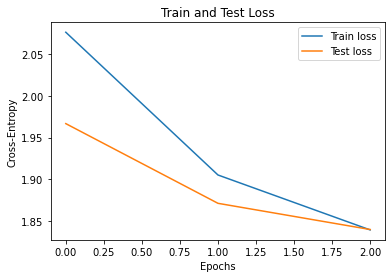

In [10]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()